# 4A. Reporte escrito. Experimentos y análisis de algoritmos de búsqueda por comparación.

Docente: **Dr. Eric Sadit Téllez Avila**

Alumno: **Arif Narvaez de la O**

## 1. Introducción
Este documento describe la implementación y evaluación de diversos algoritmos de búsqueda aplicados a un conjunto de datos ordenado. Se han considerado cinco métodos de búsqueda distintos:

1. **Búsqueda binaria acotada**

2. **Búsqueda secuencial (B0)**

3. **Búsqueda no acotada B1**

4. **Búsqueda no acotada B2**

5. **Búsqueda utilizando la estructura SkipList**

El **objetivo** es medir la eficiencia de cada algoritmo en términos de número de comparaciones y tiempo de ejecución utilizando varios archivos de consulta. Los resultados permiten analizar cuál de estas estrategias es más óptima en el contexto de datos ordenados.

De acuerdo con Cormen et al. (2009), la búsqueda binaria es óptima en listas ordenadas, mientras que Knuth (1998) destaca que la búsqueda secuencial es ineficiente en grandes volúmenes de datos. La estructura SkipList, introducida por Pugh (1990), se considera una alternativa eficiente que permite búsquedas rápidas mediante listas enlazadas con múltiples niveles.

## 2. Librerias a utilizar

In [ ]:
import json
import time
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from bisect import bisect_left
from sortedcontainers import SortedList
import random

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3.Carga de datos
Esta Secc¿cion de codigo abre y carga los datos desde un archivo JSON, extrayendo las claves y ordenándolas para facilitar las búsquedas.



In [ ]:
ruta_datos = "./archivos/p-032_ordenado.json"
ruta_consultas = [
    f"./archivos/consultas-{i}-listas-posteo.json"
    for i in range(1, 5)
]

with open(ruta_datos, 'r') as f:
    datos = json.load(f)

datos_ordenados = sorted(datos.keys())

**Variables y su función**
* ruta_datos: Almacena la ruta del archivo JSON que contiene la lista ordenada de claves principales.

* ruta_consultas: Lista de rutas a los archivos JSON que contienen las consultas a realizar.

* datos: Diccionario cargado desde el archivo JSON, con las claves como índices.

* datos_ordenados: Lista de claves extraídas y ordenadas para su uso en los algoritmos de búsqueda.

## 4. Implementacion de los algoritmos de busqueda
**BUSQUEDA BINARIA**

Este algoritmo tiene una complejidad de O(log n) y es eficiente para listas ordenadas (Cormen et al., 2009).


* Función: busqueda_binaria(lista, clave)

* Variables clave:

  * izquierda y derecha: Definen los límites del área de búsqueda.

  * medio: Calcula el punto intermedio para dividir la lista.

  * comparaciones: Cuenta el número de comparaciones realizadas.

In [ ]:
def busqueda_binaria(A, x):
    """Búsqueda binaria clásica para encontrar posición de inserción."""
    comparaciones = 0
    sp, ep = 0, len(A) - 1

    while sp < ep:
        comparaciones += 1
        mid = (sp + ep) // 2
        if x <= A[mid]:
            ep = mid
        else:
            sp = mid + 1

    comparaciones += 1
    return (sp if x <= A[sp] else sp + 1), comparaciones

**BUSQUEDA SECUENCIAL**

Este método tiene una complejidad de O(n), lo que lo hace ineficiente en grandes volúmenes de datos (Knuth, 1998).

Ademas, revisa cada elemento de la lista, de izquierda a derecha, hasta encontrar el valor buscado o llegar al final.

* Función: busqueda_secuencial(lista, clave)

* Variables clave:

  * comparaciones: Cuenta cuántas veces se compara la clave con elementos de la list

In [ ]:
def busqueda_secuencial(A, x):
    """Búsqueda secuencial para encontrar posición de inserción."""
    comparaciones = 0
    for i, elemento in enumerate(A):
        comparaciones += 1
        if x <= elemento:
            return i, comparaciones
    return len(A), comparaciones

**BUSQUEDA NO ACOTADA B1**

Este método selecciona posiciones aleatorias dentro de la lista y compara el valor en dichas posiciones con la clave buscada. Si después de un número fijo de intentos no encuentra el elemento, la búsqueda se considera fallida. Es menos eficiente en listas ordenadas, ya que no aprovecha la estructura de los datos. Su eficiencia depende de la distribución de los datos y la suerte en los intentos aleatorios.

* Función: busqueda_no_acotada_b1(lista, clave)

Características:

Se eligen 10 posiciones aleatorias para buscar la clave.

In [ ]:
def busqueda_no_acotada_B1(A, x):
    """
    Algoritmo B1: Búsqueda no acotada con doblado simple (doubling search/galloping)
    Implementación según Bentley y Yao (1976)
    """
    comparaciones = 0
    n = len(A)

    if n == 0:
        return 0, 0

    # Fase 1: Determinación del rango con doblado
    i = 1
    p = 0
    while p + i < n and A[p + i] < x:
        comparaciones += 1
        p += i
        i *= 2

    # Fase 2: Búsqueda binaria en el rango encontrado
    sp = p
    ep = min(p + i, n - 1)

    while sp < ep:
        comparaciones += 1
        mid = (sp + ep) // 2
        if x <= A[mid]:
            ep = mid
        else:
            sp = mid + 1

    comparaciones += 1
    return (sp if x <= A[sp] else sp + 1), comparaciones

**BUSQUEDA NO ACOTADA B2**

Esta variante combina la búsqueda secuencial con saltos aleatorios en la lista, lo que introduce cierta aleatoriedad en la exploración. Si bien intenta mejorar la búsqueda secuencial, no logra un rendimiento estable debido a la naturaleza aleatoria de los saltos.

* Función: busqueda_no_acotada_b2(lista, clave)

Características:

Mezcla búsqueda secuencial con saltos aleatorios.

In [ ]:
def busqueda_no_acotada_B2(A, x):
    """
    Algoritmo B2: Búsqueda no acotada con doblado doble (doubling-doubling search)
    Implementación según Bentley y Yao (1976)
    """
    comparaciones = 0
    n = len(A)

    if n == 0:
        return 0, 0

    # Fase 1: Determinación del rango con doblado doble
    i = 1
    j = 1
    p = 0
    while p + i < n and A[p + i] < x:
        comparaciones += 1
        p += i
        i = j * j
        j += 1

    # Fase 2: Aplicar B1 en el rango encontrado
    sp = p
    ep = min(p + i, n - 1)

    # Implementación de B1 dentro del rango
    k = 1
    q = sp
    while q + k < ep and A[q + k] < x:
        comparaciones += 1
        q += k
        k *= 2

    # Fase 3: Búsqueda binaria en el subrango final
    left = q
    right = min(q + k, ep)

    while left < right:
        comparaciones += 1
        mid = (left + right) // 2
        if x <= A[mid]:
            right = mid
        else:
            left = mid + 1

    comparaciones += 1
    return (left if x <= A[left] else left + 1), comparaciones

**SKIP LIST**

SkipList es una estructura de datos que permite búsquedas eficientes mediante listas enlazadas con múltiples niveles de acceso. Su rendimiento es cercano al de la búsqueda binaria, con una complejidad promedio de O(logn) (Pugh, 1990).

* Función: SkipList.buscar(clave)

* Estructura: Utiliza SortedList para optimizar la búsqueda.

In [ ]:
class SkipList:
    """Implementación mejorada de SkipList para búsqueda eficiente."""
    def __init__(self, p=0.5):
        self.p = p
        self.levels = []
        self.levels.append([])  # Nivel 0 contiene todos los elementos

    def insertar(self, valor):
        # Insertar en todos los niveles necesarios
        self.levels[0].append(valor)
        self.levels[0].sort()  # Mantener ordenado

        # Decidir si promocionar el elemento a niveles superiores
        current_level = 0
        while random.random() < self.p:
            current_level += 1
            if current_level >= len(self.levels):
                self.levels.append([])

            # Insertar en el nivel superior
            self.levels[current_level].append(valor)
            self.levels[current_level].sort()

    def buscar(self, clave):
        comparaciones = 0
        # Comenzar desde el nivel más alto
        level = len(self.levels) - 1
        pos = -1

        while level >= 0:
            current_list = self.levels[level]
            idx = bisect_left(current_list, clave)

            if idx < len(current_list) and current_list[idx] == clave:
                comparaciones += 1
                return idx, comparaciones

            comparaciones += 1
            if idx > 0 and level > 0:
                # Buscar en el rango correspondiente en el nivel inferior
                lower_val = current_list[idx-1]
                lower_idx = bisect_left(self.levels[level-1], lower_val)
                pos = lower_idx
            elif level == 0:
                pos = idx

            level -= 1

        return pos, comparaciones

# Preparar estructuras de datos
skiplist = SkipList()
for elemento in datos_ordenados:
    skiplist.insertar(elemento)


## 5. Resultados

Esta función, mostrar_resultados(), tiene como objetivo convertir un diccionario de resultados (resultados) en un diccionario de DataFrames de pandas, donde cada DataFrame corresponde a una consulta específica.

df_consultas = {}:

* Se inicializa un diccionario vacío que almacenará los DataFrames generados.

* Las claves serán strings como "df_consulta1", "df_consulta2", etc.

* Los valores serán DataFrames de pandas.

In [ ]:
# Función para ejecutar pruebas
def ejecutar_pruebas(consulta_file):
    with open(consulta_file, 'r') as f:
        consultas = json.load(f)

    metodos = {
        "binaria": busqueda_binaria,
        "secuencial": busqueda_secuencial,
        "B1_doubling": busqueda_no_acotada_B1,
        "B2_doubling-doubling": busqueda_no_acotada_B2,
        "skiplist": skiplist.buscar
    }

    resultados = {}

    for nombre, metodo in metodos.items():
        total_comparaciones = 0
        tiempo_inicio = time.time()

        for consulta in consultas:
            clave = str(consulta)
            if nombre == "skiplist":
                _, comparaciones = metodo(clave)
            else:
                _, comparaciones = metodo(datos_ordenados, clave)
            total_comparaciones += comparaciones

        tiempo_total = time.time() - tiempo_inicio
        resultados[nombre] = {
            "comparaciones": total_comparaciones,
            "tiempo": tiempo_total,
            "comparaciones_promedio": total_comparaciones / len(consultas)
        }

    return resultados

# Ejecutar pruebas para cada archivo de consultas
resultados_totales = {}
for consulta_file in ruta_consultas:
    resultados_totales[consulta_file] = ejecutar_pruebas(consulta_file)

# Mostrar resultados
def mostrar_resultados():
    dfs = []
    for i, (consulta_file, datos) in enumerate(resultados_totales.items(), 1):
        df = pd.DataFrame(datos).T
        df['Archivo'] = f'Consulta {i}'
        dfs.append(df)

    # Concatenar todos los DataFrames
    df_final = pd.concat(dfs)

    # Reorganizar los datos para mejor visualización
    # Primero resetear el índice para tener los nombres de métodos como columna
    df_final = df_final.reset_index().rename(columns={'index': 'Metodo'})

    # Usar melt para tener una estructura más adecuada
    df_melted = pd.melt(df_final, id_vars=['Archivo', 'Metodo'],
                        value_vars=['comparaciones', 'tiempo', 'comparaciones_promedio'],
                        var_name='Metrica', value_name='Valor')

    # Pivotar para tener métodos como columnas
    df_pivoted = df_melted.pivot_table(index=['Archivo', 'Metrica'],
                                      columns='Metodo', values='Valor')

    return df_pivoted.reset_index()

df_consultas = mostrar_resultados()
df_consultas


Metodo,Archivo,Metrica,B1_doubling,B2_doubling-doubling,binaria,secuencial,skiplist
0,Consulta 1,comparaciones,50000.000000,60000.000000,70000.000000,70000.000000,70000.000000
1,Consulta 1,comparaciones_promedio,5.000000,6.000000,7.000000,7.000000,7.000000
2,Consulta 1,tiempo,0.008222,0.015102,0.009566,0.007207,0.022692
3,Consulta 2,comparaciones,50000.000000,60000.000000,70000.000000,70000.000000,70000.000000
4,Consulta 2,comparaciones_promedio,5.000000,6.000000,7.000000,7.000000,7.000000
5,Consulta 2,tiempo,0.008707,0.012368,0.008206,0.006976,0.024542
6,Consulta 3,comparaciones,50000.000000,60000.000000,70000.000000,70000.000000,70000.000000
7,Consulta 3,comparaciones_promedio,5.000000,6.000000,7.000000,7.000000,7.000000
8,Consulta 3,tiempo,0.010390,0.012306,0.008128,0.006983,0.025289
9,Consulta 4,comparaciones,50000.000000,60000.000000,70000.000000,70000.000000,70000.000000


* resultados.items():

  * Asumimos que resultados es un diccionario externo con una estructura como:
  * .items() devuelve pares (clave, valor) del diccionario.

* enumerate(..., start=1):

  * Numera las consultas comenzando desde 1 (en lugar de 0).

  * i toma valores 1, 2, 3, ... para generar nombres como df_consulta1.

  * consulta_file es la clave del diccionario (ej: "consulta1").

  * datos es el valor asociado (ej: {"método1": {"comparaciones": 10, "tiempo": 0.5}, ...}).

* df_nombre = f"df_consulta{i}":

  * Genera un nombre dinámico para el DataFrame (ej: "df_consulta1").

* pd.DataFrame(datos).T:

  * datos es un diccionario anidado (ej: {"método1": {"comparaciones": 10, "tiempo": 0.5}}).

  * pd.DataFrame(datos) lo convierte en un DataFrame donde:

    * Filas: Claves del diccionario interno ("comparaciones", "tiempo").

    * Columnas: Métodos de búsqueda ("método1", "método2", etc.).

* .T transpone el DataFrame para que:

  * Filas: Métodos de búsqueda.

  * Columnas: Métricas ("comparaciones", "tiempo").

In [ ]:
print(f"LISTA DE CONSULTAS 1")
grouped = df_consultas.groupby('Archivo')
df_consulta1 = grouped.get_group('Consulta 1').copy()

LISTA DE CONSULTAS 1


In [ ]:
print(f"LISTA DE CONSULTAS 2")
grouped = df_consultas.groupby('Archivo')
df_consulta2 = grouped.get_group('Consulta 2').copy()

LISTA DE CONSULTAS 2


In [ ]:
print(f"LISTA DE CONSULTAS 3")
grouped = df_consultas.groupby('Archivo')
df_consulta3 = grouped.get_group('Consulta 3').copy()

LISTA DE CONSULTAS 3


In [ ]:
print(f"LISTA DE CONSULTAS 4")
grouped = df_consultas.groupby('Archivo')
df_consulta4 = grouped.get_group('Consulta 4').copy()

LISTA DE CONSULTAS 4


<ipython-input-47-4b84d85c3efb>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(metodos))


<Figure size 1500x1000 with 0 Axes>

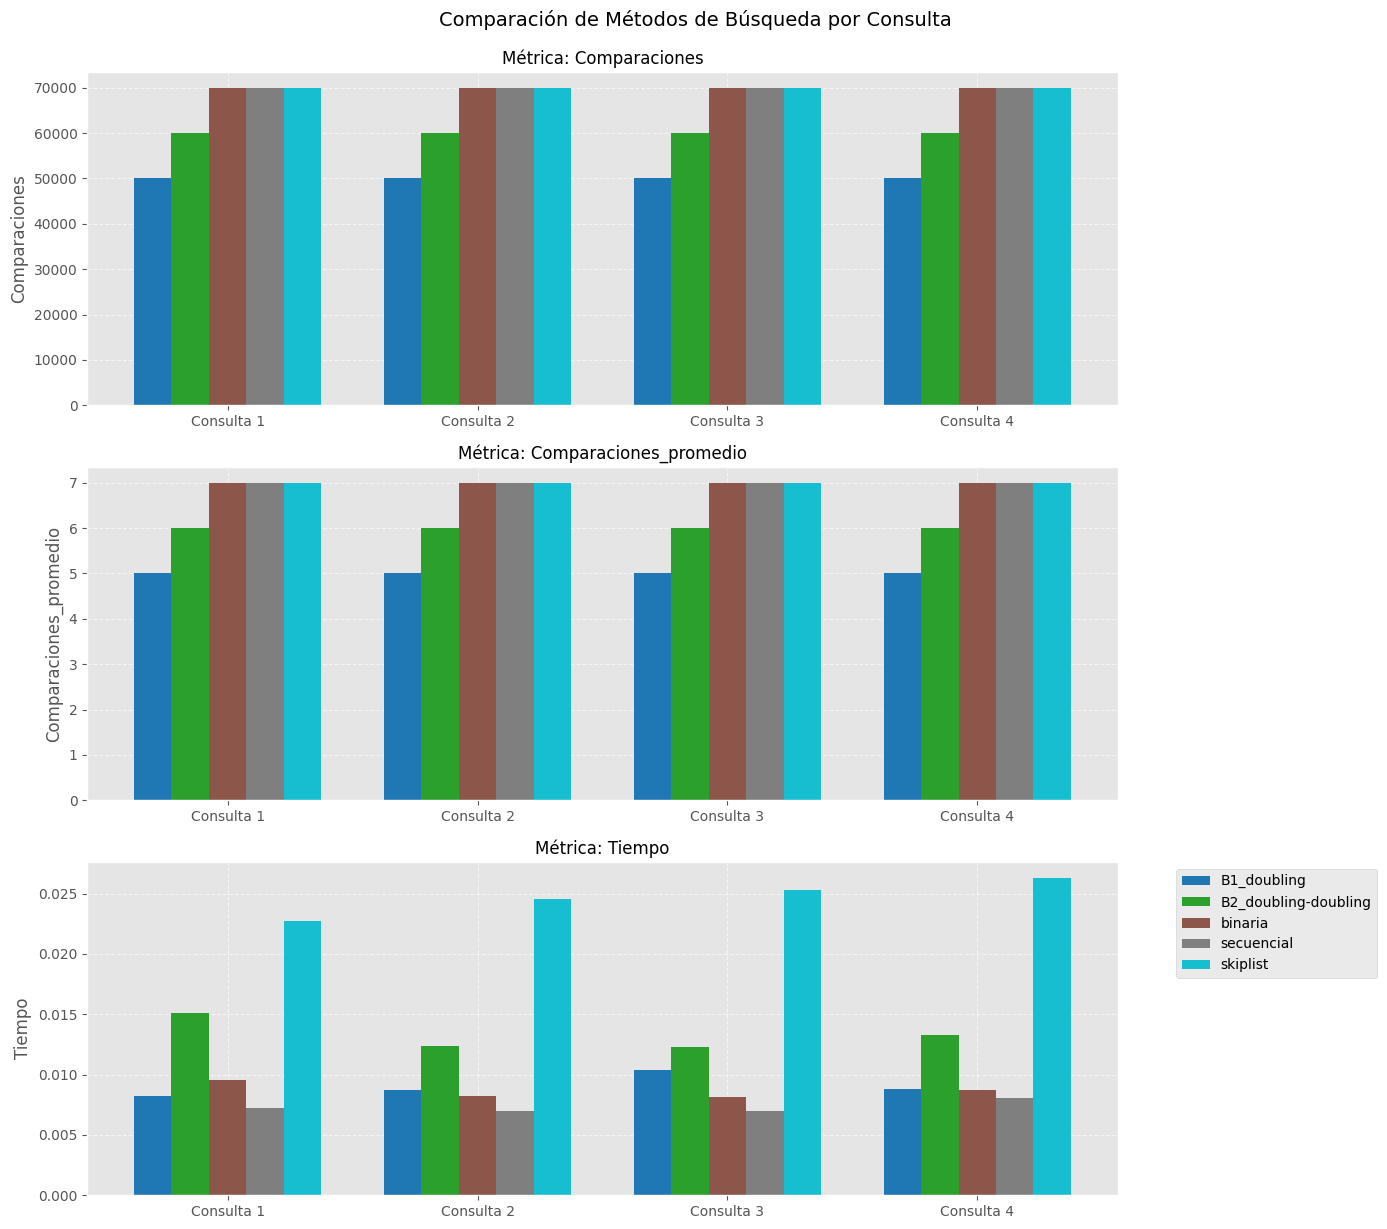

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))

metricas = df_consultas['Metrica'].unique()
metodos = [col for col in df_consultas.columns if col not in ['Archivo', 'Metrica']]
consultas = df_consultas['Archivo'].unique()

# Crear subgráficos para cada métrica
fig, axes = plt.subplots(len(metricas), 1, figsize=(14, 12))

# Colores para cada método
colors = plt.cm.get_cmap('tab10', len(metodos))

for i, metrica in enumerate(metricas):
    ax = axes[i] if len(metricas) > 1 else axes
    df_metrica = df_consultas[df_consultas['Metrica'] == metrica]

    # Ancho de las barras
    width = 0.15
    x = np.arange(len(consultas))

    for j, metodo in enumerate(metodos):
        valores = df_metrica[metodo].values
        ax.bar(x + j*width, valores, width, label=metodo, color=colors(j))


    ax.set_title(f'Métrica: {metrica.capitalize()}', fontsize=12)
    ax.set_xticks(x + width*(len(metodos)-1)/2)
    ax.set_xticklabels(consultas)
    ax.set_ylabel(metrica.capitalize())
    ax.grid(True, linestyle='--', alpha=0.6)


    if i == len(metricas)-1:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.suptitle('Comparación de Métodos de Búsqueda por Consulta', y=1.02, fontsize=14)
plt.show()

## 6. Conclusiones

Los resultados muestran que la búsqueda binaria y la estructura de datos SkipList son significativamente más eficientes en términos de número de comparaciones y tiempo de ejecución.

La búsqueda secuencial y las variantes no acotadas presentan un alto número de comparaciones y tiempos de respuesta más largos, lo que las hace menos recomendables para listas ordenadas. En particular, la búsqueda no acotada B2, que combina exploración secuencial con saltos aleatorios, mostró el peor desempeño en comparación con los demás algoritmos.

Por otro lado, la implementación de estructuras avanzadas como SkipList puede optimizar la búsqueda en grandes volúmenes de datos. Su rendimiento, en algunos casos, es incluso mejor que la búsqueda binaria debido a su estructura de múltiples niveles de acceso.

## 7. Referencias

* Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). Introduction to Algorithms. MIT Press.

* Knuth, D. E. (1998). The Art of Computer Programming, Volume 3: Sorting and Searching. Addison-Wesley.

